In [17]:
import pandas as pd

df_path = "/home/ngaggion/DATA/Raices/Analisis/NF-YA10/Report/all_data.csv"
df = pd.read_csv(df_path, sep=",")

df.head()

,Time,mainRootLength,lateralRootsLength,totalRootsLength,mainRootGrad,lateralRootsGrad,totalRootsGrad,NumberOfLateralRoots,newDay,mainOverTotal,lateralRootDensity,lateralRootContDensity,Plant_id,Experiment
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,100.0,0.0,0.0,_rpi6_2_new_Results 0,C2_9
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,100.0,0.0,0.0,_rpi6_2_new_Results 0,C2_9
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,100.0,0.0,0.0,_rpi6_2_new_Results 0,C2_9
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,100.0,0.0,0.0,_rpi6_2_new_Results 0,C2_9
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,100.0,0.0,0.0,_rpi6_2_new_Results 0,C2_9


In [18]:
import numpy as np 

dates = np.array([1,2,3,4,5,6,7,8,9,10]) * 24 - 1

# get rows for each day
df_day = df[df['Time'].isin(dates)]

In [19]:
df_day

,Time,mainRootLength,lateralRootsLength,totalRootsLength,mainRootGrad,lateralRootsGrad,totalRootsGrad,NumberOfLateralRoots,newDay,mainOverTotal,lateralRootDensity,lateralRootContDensity,Plant_id,Experiment
23,23,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.0,False,100.000000,0.000000,0.000000,_rpi6_2_new_Results 0,C2_9
47,47,0.415566,0.000000,0.415566,7.157762e-02,0.000000,0.071578,0.0,False,100.000000,0.000000,0.000000,_rpi6_2_new_Results 0,C2_9
71,71,2.843781,0.000000,2.843781,1.885731e-01,0.000000,0.188573,0.0,False,100.000000,0.000000,0.000000,_rpi6_2_new_Results 0,C2_9
95,95,6.633015,0.000000,6.633015,1.928586e-01,0.000000,0.192859,0.0,False,100.000000,0.000000,0.000000,_rpi6_2_new_Results 0,C2_9
119,119,11.382830,0.000000,11.382830,2.646453e-01,0.000000,0.264645,0.0,False,100.000000,0.000000,0.000000,_rpi6_2_new_Results 0,C2_9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16703,143,22.173864,0.000000,22.173864,1.897598e-01,0.000000,0.189760,0.0,False,100.000000,0.000000,0.000000,_rpi12_2_new_Results 2,Col0
16727,167,30.293585,0.000000,30.293585,2.438995e-01,0.000000,0.243899,0.0,False,100.000000,0.000000,0.000000,_rpi12_2_new_Results 2,Col0
16751,191,39.572172,6.741100,46.313272,4.173872e-01,0.132287,0.549674,3.0,False,85.444562,0.758108,0.170349,_rpi12_2_new_Results 2,Col0
16775,215,49.960499,14.444759,64.405258,6.439075e-01,0.280550,0.924457,8.0,False,77.572081,1.601265,0.289124,_rpi12_2_new_Results 2,Col0


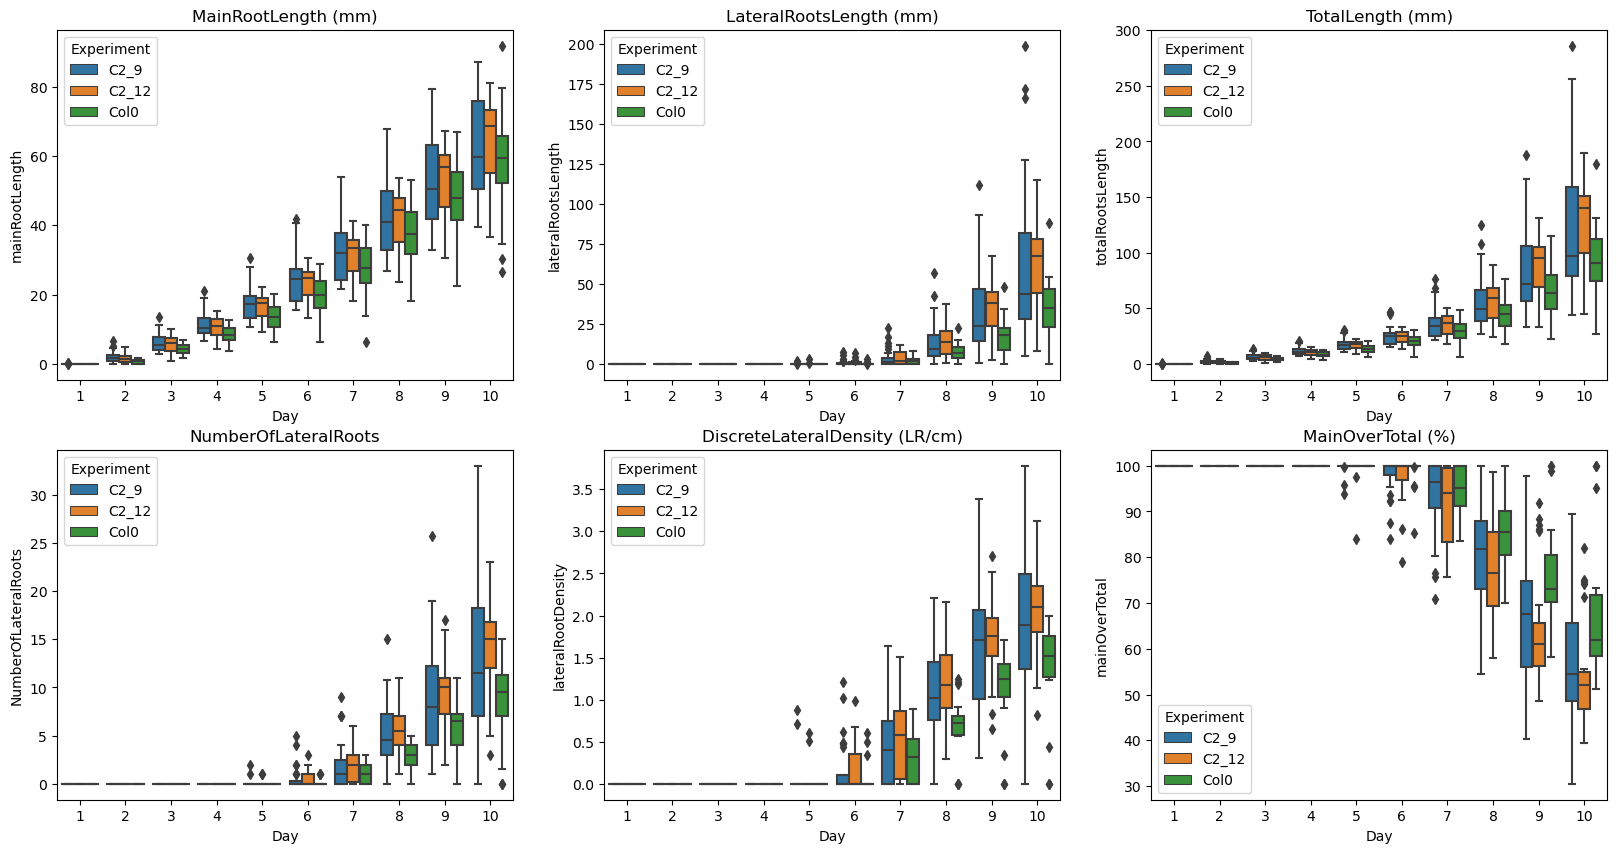

In [20]:
metrics = ["mainRootLength","lateralRootsLength","totalRootsLength", 
           'NumberOfLateralRoots', 'lateralRootDensity', 'mainOverTotal']

metrics_names = ['MainRootLength (mm)', 'LateralRootsLength (mm)', 'TotalLength (mm)', 
           'NumberOfLateralRoots', 'DiscreteLateralDensity (LR/cm)', 'MainOverTotal (%)']

import seaborn as sns
import matplotlib.pyplot as plt

# Draw boxplots for each metric hue = Experiment, y = metric, x = day

plt.figure(figsize=(20, 10))
i = 1
for j in range(len(metrics)):
    ax = plt.subplot(2, 3, i)
    sns.boxplot(x="Time", y=metrics[j], hue="Experiment", data=df_day, ax=ax)
    # replace the actual date with the day number
    xticklabels = [1,2,3,4,5,6,7,8,9,10]
    ax.set_xticklabels(xticklabels)
    ax.set_xlabel("Day")
    ax.set_title(metrics_names[j])   

    i += 1

In [24]:
from scipy.stats import mannwhitneyu

# For each metric at each day, perform a Mann-Whitney U test between the two experiments
j = 0
for metric in metrics:
    print("Tests para", metrics_names[j], "NFYA MUT 1 vs WT")
    print("")
    
    day = 1
    for date in dates:
        df_date = df_day[df_day['Time'] == date]
        df_date_exp1 = df_date[df_date['Experiment'] == "C2_9"]
        df_date_exp2 = df_date[df_date['Experiment'] == "Col0"]
        try:
            u, p = mannwhitneyu(df_date_exp1[metric], df_date_exp2[metric])
        except:
            p = 1
             
        print('Time', date, 'Dia', day)
        print(metrics_names[j], 'p-value:', p)
        if p < 0.05:
            print("Significativo")

        day += 1
    j+=1
    print("")
    
# For each metric at each day, perform a Mann-Whitney U test between the two experiments
j = 0
for metric in metrics:
    print("Tests para", metrics_names[j], "NFYA MUT 2 vs WT")
    print("")
    
    day = 1
    for date in dates:
        df_date = df_day[df_day['Time'] == date]
        df_date_exp1 = df_date[df_date['Experiment'] == "C2_12"]
        df_date_exp2 = df_date[df_date['Experiment'] == "Col0"]
        try:
            u, p = mannwhitneyu(df_date_exp1[metric], df_date_exp2[metric])
        except:
            p = 1
            
        print('Time', date, 'Dia', day)
        print(metrics_names[j], 'p-value:', p)
        if p < 0.05:
            print("Significativo")

        day += 1
    
    print("")
    j+=1

Tests para MainRootLength (mm) NFYA MUT 1 vs WT

Time 23 Dia 1
MainRootLength (mm) p-value: 0.061676909747579355
Time 47 Dia 2
MainRootLength (mm) p-value: 0.0025739678775719577
Significativo
Time 71 Dia 3
MainRootLength (mm) p-value: 0.012011258917851464
Significativo
Time 95 Dia 4
MainRootLength (mm) p-value: 0.010567505566573628
Significativo
Time 119 Dia 5
MainRootLength (mm) p-value: 0.00990409502873327
Significativo
Time 143 Dia 6
MainRootLength (mm) p-value: 0.026214075608385345
Significativo
Time 167 Dia 7
MainRootLength (mm) p-value: 0.06674940886664417
Time 191 Dia 8
MainRootLength (mm) p-value: 0.11358589108114964
Time 215 Dia 9
MainRootLength (mm) p-value: 0.16759784567173125
Time 239 Dia 10
MainRootLength (mm) p-value: 0.24342463415672883

Tests para LateralRootsLength (mm) NFYA MUT 1 vs WT

Time 23 Dia 1
LateralRootsLength (mm) p-value: 1
Time 47 Dia 2
LateralRootsLength (mm) p-value: 1
Time 71 Dia 3
LateralRootsLength (mm) p-value: 1
Time 95 Dia 4
LateralRootsLength (mm)

In [36]:
import pandas as pd
from scipy.stats import mannwhitneyu

frame = pd.read_csv("/home/ngaggion/DATA/Raices/Analisis/NFYA10_COMB/Report/lateraldata.csv")
metrics =["Mean emergence angle"]

frame = frame[frame['Hour'] == 0.0]
frame = frame[frame['Mean emergence angle'] > 0]

for metric in metrics:

        
    for day in range(6, 11):
        df_day = frame[frame['Day'] == day]

        df_day_exp1 = df_day[df_day['Experiment'] == "C2_12"]
        df_day_exp2 = df_day[df_day['Experiment'] == "Col0"]

        u, p = mannwhitneyu(df_day_exp1[metric], df_day_exp2[metric])
        print('Dia', day)
        print(metric, 'p-value:', p)
        if p < 0.05:
            print("Significativo")
    print("")


Dia 6
Mean emergence angle p-value: 0.42290741931287895
Dia 7
Mean emergence angle p-value: 0.3560047325673826
Dia 8
Mean emergence angle p-value: 0.27588195259519005
Dia 9
Mean emergence angle p-value: 0.020000637836363768
Significativo
Dia 10
Mean emergence angle p-value: 0.0025594678956349214
Significativo



In [37]:
df_day[df_day['Experiment'] == "NFYA2"]["Mean emergence angle"].mean()

65.40196153846153

In [38]:
df_day[df_day['Experiment'] == "WT"]["Mean emergence angle"].mean()

55.75754347826086

Angles report
Experiment: C2_9 - Total plants 28
Experiment: C2_12 - Total plants 26
Experiment: Col0 - Total plants 16
Experiment: Report - Total plants 0


<Figure size 1600x1800 with 0 Axes>

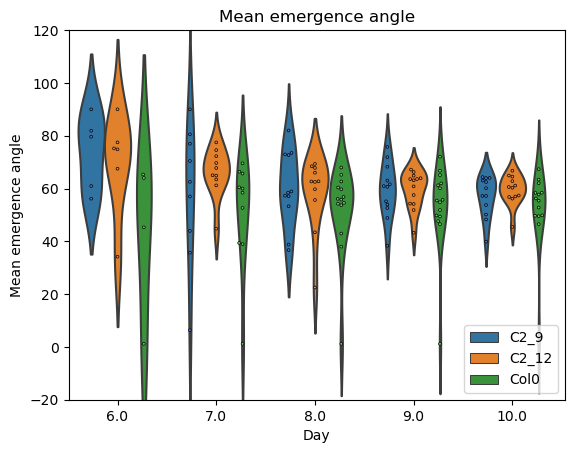

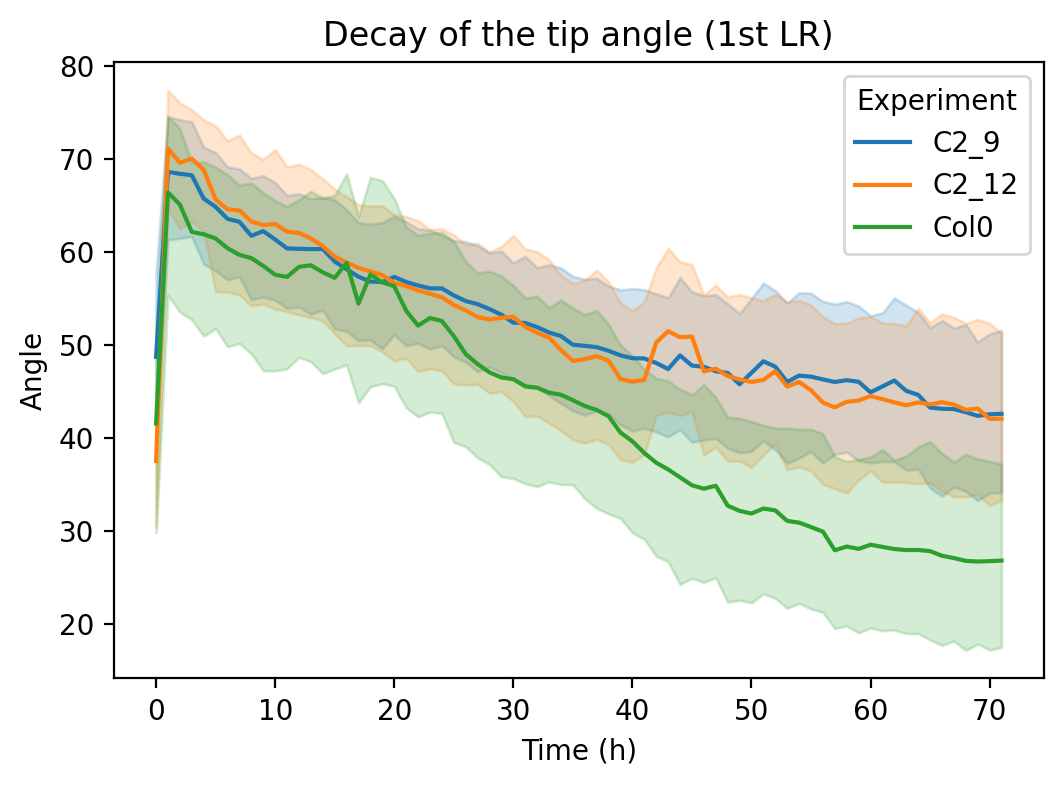

In [1]:
from analysis.lateral_angles import makeLateralAnglesPlots

conf = {'MainFolder': "/home/ngaggion/DATA/Raices/Analisis/NF-YA10", 'Limit': 0, 'daysAngles': "6,7,8,9,10"}
makeLateralAnglesPlots(conf)

In [4]:
import pandas as pd
from scipy.stats import mannwhitneyu

frame = pd.read_csv("/home/ngaggion/DATA/Raices/Analisis/NF-YA10/Report/syncronizedFirstLR.csv")

print("C2_9 vs Col0")
for day in [11, 23, 35, 47, 59, 71]:
    df_day = frame[frame['i'] == day]

    df_day_exp1 = df_day[df_day['Experiment'] == "C2_9"]
    df_day_exp2 = df_day[df_day['Experiment'] == "Col0"]

    u, p = mannwhitneyu(df_day_exp1["First LR tip"], df_day_exp2["First LR tip"])
    print('Hora', day + 1)
    print("First LR tip", 'p-value:', p)
    if p < 0.05:
        print("Significativo")
        

print("C2_12 vs Col0")
for day in [11, 23, 35, 47, 59, 71]:
    df_day = frame[frame['i'] == day]

    df_day_exp1 = df_day[df_day['Experiment'] == "C2_12"]
    df_day_exp2 = df_day[df_day['Experiment'] == "Col0"]

    u, p = mannwhitneyu(df_day_exp1["First LR tip"], df_day_exp2["First LR tip"])
    print('Hora', day + 1)
    print("First LR tip", 'p-value:', p)
    if p < 0.05:
        print("Significativo")

C2_9 vs Col0
Hora 12
First LR tip p-value: 0.36935006354412947
Hora 24
First LR tip p-value: 0.48935594559432893
Hora 36
First LR tip p-value: 0.3155037128710988
Hora 48
First LR tip p-value: 0.04025612183799076
Significativo
Hora 60
First LR tip p-value: 0.006539729212572471
Significativo
Hora 72
First LR tip p-value: 0.018084512027678978
Significativo
C2_12 vs Col0
Hora 12
First LR tip p-value: 0.07746051856735524
Hora 24
First LR tip p-value: 0.2929680380656089
Hora 36
First LR tip p-value: 0.1073427161409406
Hora 48
First LR tip p-value: 0.027321597695115513
Significativo
Hora 60
First LR tip p-value: 0.012079352119198802
Significativo
Hora 72
First LR tip p-value: 0.014668124849867296
Significativo


In [3]:
frame

,i,First LR tip,Experiment,Plant_id
0,0,31.97375,NFYA2,_rpi6_o_cam_1_plant_2
1,1,29.74500,NFYA2,_rpi6_o_cam_1_plant_2
2,2,29.74500,NFYA2,_rpi6_o_cam_1_plant_2
3,3,29.74500,NFYA2,_rpi6_o_cam_1_plant_2
4,4,29.74500,NFYA2,_rpi6_o_cam_1_plant_2
...,...,...,...,...
2371,67,29.42250,WT,_rpi23_cam_1_plant_3
2372,68,29.00675,WT,_rpi23_cam_1_plant_3
2373,69,27.90275,WT,_rpi23_cam_1_plant_3
2374,70,27.44775,WT,_rpi23_cam_1_plant_3


Angles report
Experiment: NFYA2 - Total plants 13
Experiment: WT - Total plants 24


<Figure size 1600x1800 with 0 Axes>

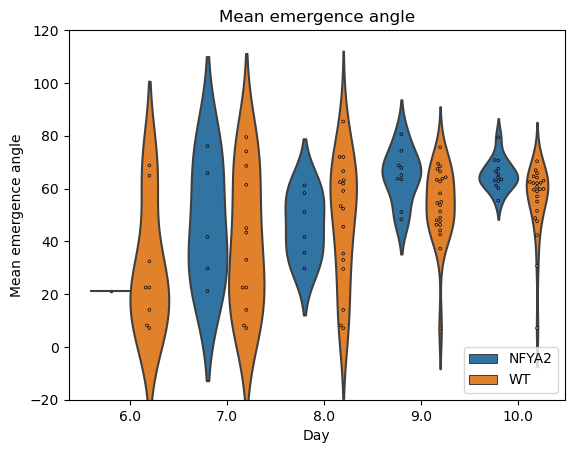

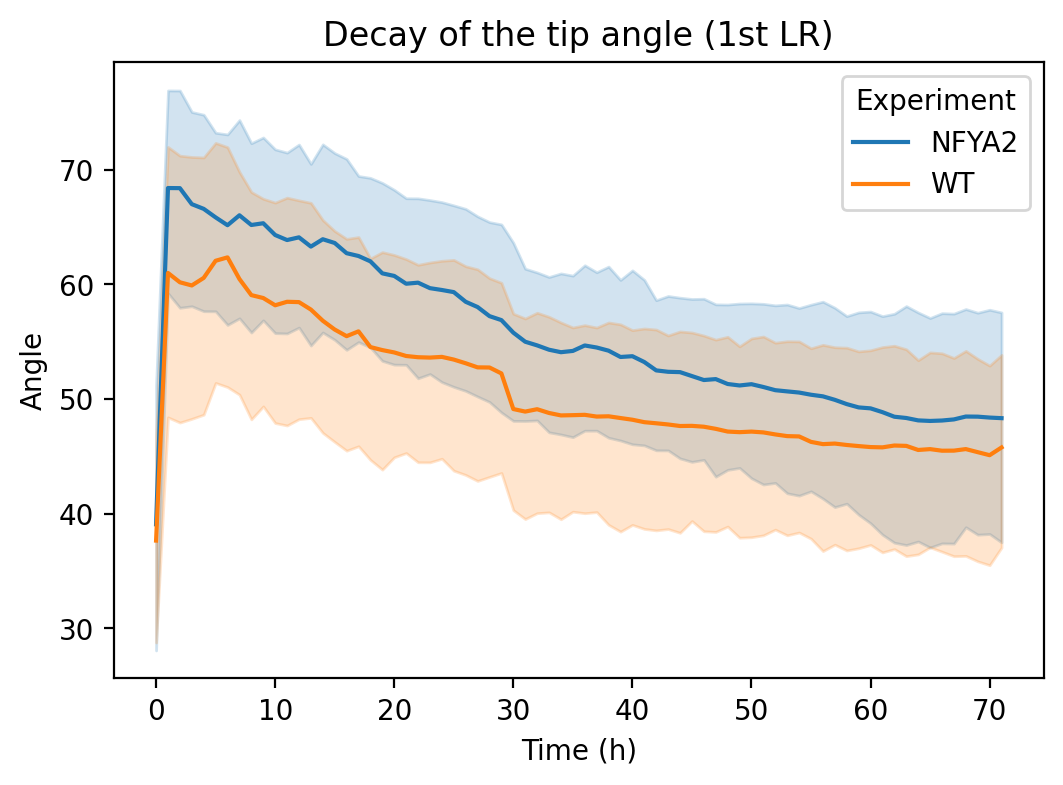

In [3]:
from analysis.lateral_angles import makeLateralAnglesPlots

conf = {'MainFolder': "/home/ngaggion/DATA/Raices/Analisis/NFYA10_COMB", 'Limit': 0, 'daysAngles': "6,7,8,9,10"}
makeLateralAnglesPlots(conf)

In [1]:
import pandas as pd
from scipy.stats import mannwhitneyu

frame = pd.read_csv("/home/ngaggion/DATA/Raices/Analisis/NFYA10_COMB/Report/syncronizedFirstLR.csv")

print("NFYA2 VS WT")
for day in [11, 23, 35, 47, 59, 71]:
    df_day = frame[frame['i'] == day]

    df_day_exp1 = df_day[df_day['Experiment'] == "NFYA2"]
    df_day_exp2 = df_day[df_day['Experiment'] == "WT"]

    u, p = mannwhitneyu(df_day_exp1["First LR tip"], df_day_exp2["First LR tip"])
    print('Hora', day + 1)
    print("First LR tip", 'p-value:', p)
    if p < 0.05:
        print("Significativo")

NFYA2 VS WT
Hora 12
First LR tip p-value: 0.47062702788904537
Hora 24
First LR tip p-value: 0.3094565397148018
Hora 36
First LR tip p-value: 0.21413898936321835
Hora 48
First LR tip p-value: 0.24774266322214905
Hora 60
First LR tip p-value: 0.24774266322214905
Hora 72
First LR tip p-value: 0.33589093176597085
